# Phase 3 Data Science Training Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


## Exploratory Data Analysis

In [3]:
import tarfile

def extractFiles(tarFileName):
    fileObj = tarfile.open(tarFileName, "r")
    fileObj.extractall("F://2022-Phase-3\data-science\skeleton-code")
    fileObj.close()

In [4]:
extractFiles("cifar-10-python.tar.gz")


In [5]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
from cgi import test


batch1 = unpickle("cifar-10-batches-py/data_batch_1")
batch2 = unpickle("cifar-10-batches-py/data_batch_2")
batch3 = unpickle("cifar-10-batches-py/data_batch_3")
batch4 = unpickle("cifar-10-batches-py/data_batch_4")
batch5 = unpickle("cifar-10-batches-py/data_batch_5")
testBatch = unpickle("cifar-10-batches-py/test_batch")

testBatchData = testBatch[b'data']
print(testBatch.keys())
shapedTestBatchData = testBatchData.reshape(len(testBatchData),3,32, 32).transpose(0,2,3,1) # reshaped data into 32x32 image
print(shapedTestBatchData.shape)

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
(10000, 32, 32, 3)


In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

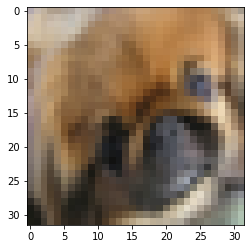

In [8]:
plt.imshow(shapedTestBatchData[2342]) # testing if data has been shaped correctly.

In [9]:
allFileNamesList = list()
allLabelsList = list()
allFileNamesList.extend(batch1[b'filenames'])
allFileNamesList.extend(batch2[b'filenames'])
allFileNamesList.extend(batch3[b'filenames'])
allFileNamesList.extend(batch4[b'filenames'])
allFileNamesList.extend(batch5[b'filenames'])
allLabelsList += batch1[b'labels']
allLabelsList += batch2[b'labels']
allLabelsList += batch3[b'labels']
allLabelsList += batch4[b'labels']
allLabelsList += batch5[b'labels']
print(len(allFileNamesList))
allDataList = np.concatenate((batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']), axis =0)
allDataList.shape


50000


(50000, 3072)

In [10]:
allShapedData = allDataList.reshape(len(allDataList),3,32,32).transpose(0,2,3,1)
allShapedData.shape


(50000, 32, 32, 3)

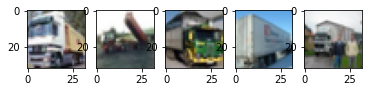

In [11]:
truck_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 9:
        truck_indices.append(j)
for i in range(0,5):
    image = allShapedData[truck_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

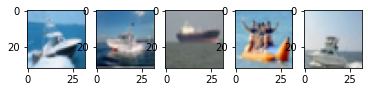

In [12]:
boat_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 8:
        boat_indices.append(j)
for i in range(0,5):
    image = allShapedData[boat_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

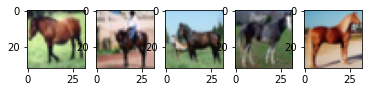

In [13]:
horse_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 7:
        horse_indices.append(j)
for i in range(0,5):
    image = allShapedData[horse_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

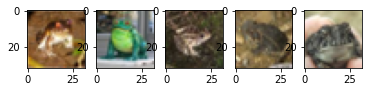

In [14]:
frog_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 6:
        frog_indices.append(j)
for i in range(0,5):
    image = allShapedData[frog_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

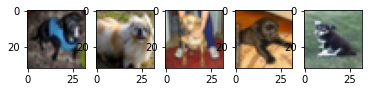

In [15]:
dog_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 5:
        dog_indices.append(j)
for i in range(0,5):
    image = allShapedData[dog_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

# Data Processing

In [16]:
allShapedData = allDataList.reshape(len(allDataList),3,32,32).transpose(0,2,3,1)

train_x = allShapedData
train_y = np.array(allLabelsList)

test_x = shapedTestBatchData
test_y = np.array(testBatch[b'labels'])

train_x, test_x = train_x / 255.0, test_x / 255.0


# Data Modelling

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime
import kerastuner as kt

C:\Users\danpa\AppData\Local\Temp\ipykernel_6004\127640181.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [23]:
# def model_builder(hp):
#     mlmodel = keras.Sequential()

#     mlmodel.add(keras.layers.Flatten(input_shape=(32,32,3)))
#     mlmodel.add(keras.layers.Dense(3000, activation = "relu"))
#     mlmodel.add(keras.layers.Dense(200, activation = "relu"))
#     mlmodel.add(keras.layers.Dense(40, activation = "softmax"))

#     log_dir = os.path.join(r'output\logs' , datetime.now().strftime("%Y-%m-%d-%H%M%S"))

#     # Callbacks for QoL.
#     tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#     earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

#     mlmodel.compile(optimizer='SGD',
#                 loss='sparse_categorical_crossentropy',
#                 metrics=['accuracy'])

#     mlmodel.fit(train_x, train_y,
#         validation_data=(test_x, test_y),
#         epochs=15,
        # batch_size=100, # Set this to a lower number if your computer spec is bad.

        # verbose=0 # Uncomment this line to reduce the printing on console.
    )

Epoch 1/15
1563/1563 [==============================] - 57s 37ms/step - loss: 1.8892 - accuracy: 0.3296 - val_loss: 1.7233 - val_accuracy: 0.3854
Epoch 2/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6661 - accuracy: 0.4098 - val_loss: 1.6274 - val_accuracy: 0.4229
Epoch 3/15
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5790 - accuracy: 0.4423 - val_loss: 1.5910 - val_accuracy: 0.4301
Epoch 4/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5185 - accuracy: 0.4674 - val_loss: 1.5509 - val_accuracy: 0.4476
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4663 - accuracy: 0.4819 - val_loss: 1.5179 - val_accuracy: 0.4522
Epoch 6/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4258 - accuracy: 0.4966 - val_loss: 1.4575 - val_accuracy: 0.4856
Epoch 7/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.3873 - accuracy: 0.5118 - val_loss: 1.6098 -

In [69]:
import os


def model_builder(hp):
    mlmodel = keras.Sequential()

    mlmodel.add(keras.layers.Flatten(input_shape=(32,32,3)))
    hp_units = hp.Int('units', min_value = 32, max_value=512, step=32)
    mlmodel.add(keras.layers.Dense(units=hp_units, activation='relu', name='dense_1'))
    mlmodel.add(keras.layers.Dropout(0.2))
    mlmodel.add(keras.layers.Dense(100, activation='relu'))
    mlmodel.add(keras.layers.Dense(100, activation='softmax'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])


    log_dir = os.path.join(r'output\logs' , datetime.now().strftime("%Y-%m-%d-%H%M%S"))

    # Callbacks for QoL.
    tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

    mlmodel.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

    return mlmodel

In [70]:
tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=10, factor=3, directory='dir', project_name='khyperband')
tuner.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project dir\khyperband\oracle.json
INFO:tensorflow:Reloading Tuner from dir\khyperband\tuner0.json
Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [71]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(train_x, train_y, epochs=10, validation_split=0.2, callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [72]:
best_hp=tuner.get_best_hyperparameters()[0]

In [73]:
mlmodel = tuner.hypermodel.build(best_hp)
mlmodel.summary()
mlmodel.fit(train_x, train_y, epochs=10, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               786688    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               25700     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
Total params: 822,488
Trainable params: 822,488
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [==========================

In [74]:
mlmodel.evaluate(test_x, test_y, verbose=2)


313/313 - 1s - loss: 1.5003 - accuracy: 0.4703 - 550ms/epoch - 2ms/step


[1.5003355741500854, 0.47029998898506165]

In [75]:
predict =   mlmodel.predict(test_x)

313/313 [==============================] - 1s 2ms/step


frog
frog


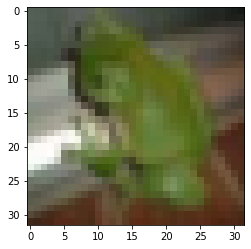

In [76]:
k = 7
prediction = np.argmax(predict[k])
print(classes[prediction])
plt.imshow(shapedTestBatchData[k])
print(classes[testBatch[b'labels'][k]])

(32, 32, 3)

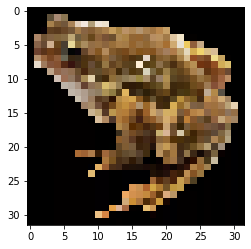

In [77]:
def process_image(png):
    importedImage = tf.keras.preprocessing.image.load_img(png, target_size = (32,32))
    importedImage = tf.keras.preprocessing.image.img_to_array(importedImage)
    importedImage = importedImage/255.0
    importedImage.reshape(32,32,3)
    plt.imshow(importedImage)
    return importedImage
importedImage = process_image('phase3Frog.png') 
importedImage.shape

In [78]:
def whatIsIt(png):
    importedImage = process_image(png)
    imagePredict = mlmodel.predict(importedImage)
    predIndex = np.argmax(imagePredict)
    print(classes[predIndex])
    plt.imshow(importedImage)

1/1 [==============================] - 0s 53ms/step
deer


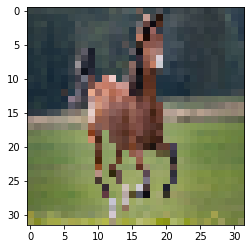

In [79]:
whatIsIt('phase3Horse.png')

In [80]:
mlmodel.save('output/my_model')

INFO:tensorflow:Assets written to: output/my_model\assets
